In [73]:
# Machine learning
from sklearn.metrics import scorer
from sklearn.metrics import accuracy_score

# For data manipulation
import pandas as pd
import numpy as np
import pandas_datareader.data as web


# To plot
import matplotlib.pyplot as plt
import seaborn as sns 
import ta

In [74]:
def nulls(df):
    nulls = pd.DataFrame(df.isnull().sum().sort_values(), columns=['nulls'])
    nulls['porcentaje'] = round(100*nulls['nulls'] / len(df), 2)
    nulls.sort_values('porcentaje')
    return nulls

In [75]:
from sklearn.metrics import mean_absolute_error
def calculate_error(test_y, predicted):
    return mean_absolute_error(test_y, predicted)
#The best possible score is 1.0, lower values are worse.
from sklearn.metrics import explained_variance_score
def variance_score(test_y, predicted):
    return explained_variance_score(test_y, predicted) 
from sklearn.metrics import median_absolute_error
def median_error(test_y, predicted):
    return median_absolute_error (test_y, predicted) 
from sklearn.metrics import r2_score
def r2(test_y, predicted):
    return r2_score(test_y, predicted) 
from sklearn.metrics import mean_squared_error
def mse(test_y, predicted):
    return mean_squared_error(test_y, predicted)

In [76]:
def add_original_feature(df, df_new):
    #df_new['open'] = df['open']
    df_new['open_1'] = df['open'].shift(1)
    df_new['close_1'] = df['close'].shift(1)
    df_new['high_1'] = df['high'].shift(1)
    df_new['low_1'] = df['low'].shift(1)
    df_new['volume_1'] = df['volume'].shift(1)
    df_new['H-L-1'] = df['high'].shift(1) - df['low'].shift(1)
    df_new['O-C-1'] = df['close'].shift(1) - df['open'].shift(1)

In [77]:
def add_avg_price(df, df_new):
    df_new['avg_price_5'] = df['close'].rolling(5).mean().shift(1)
    df_new['avg_price_30'] = df['close'].rolling(21).mean().shift(1)
    df_new['avg_price_365'] = df['close'].rolling(252).mean().shift(1)
    df_new['ratio_avg_price_5_30'] = df_new['avg_price_5'] / df_new['avg_price_30']
    df_new['ratio_avg_price_5_365'] = df_new['avg_price_5'] / df_new['avg_price_365']
    df_new['ratio_avg_price_30_365'] = df_new['avg_price_30'] / df_new['avg_price_365']

In [78]:
def add_avg_volume(df, df_new):
    df_new['avg_volume_5'] = df['volume'].rolling(5).mean().shift(1)
    df_new['avg_volume_30'] = df['volume'].rolling(21).mean().shift(1)
    df_new['avg_volume_365'] = df['volume'].rolling(252).mean().shift(1)
    df_new['ratio_avg_volume_5_30'] = df_new['avg_volume_5'] / df_new['avg_volume_30']
    df_new['ratio_avg_volume_5_365'] = df_new['avg_volume_5'] / df_new['avg_volume_365']
    df_new['ratio_avg_volume_30_365'] = df_new['avg_volume_30'] / df_new['avg_volume_365']

In [79]:
def add_std_price(df, df_new):
    df_new['std_price_5'] = df['close'].rolling(5).std().shift(1)
    df_new['std_price_30'] = df['close'].rolling(21).std().shift(1)
    df_new['std_price_365'] = df['close'].rolling(252).std().shift(1)
    df_new['ratio_std_price_5_30'] = df_new['std_price_5'] / df_new['std_price_30']
    df_new['ratio_std_price_5_365'] = df_new['std_price_5'] / df_new['std_price_365'] 
    df_new['ratio_std_price_30_365'] = df_new['std_price_30'] / df_new['std_price_365']

In [80]:
def add_std_volume(df, df_new):
    df_new['std_volume_5'] = df['volume'].rolling(5).std().shift(1)
    df_new['std_volume_30'] = df['volume'].rolling(21).std().shift(1)
    df_new['std_volume_365'] = df['volume'].rolling(252).std().shift(1)
    df_new['ratio_std_volume_5_30'] = df_new['std_volume_5'] / df_new['std_volume_30']
    df_new['ratio_std_volume_5_365'] = df_new['std_volume_5'] / df_new['std_volume_365']
    df_new['ratio_std_volume_30_365'] = df_new['std_volume_30'] / df_new['std_volume_365']

In [81]:
def add_return_feature(df, df_new):
    #df_new['return_1'] = ((df['close'] - df['close'].shift(1)) / df['close'].shift(1)).shift(1)
    df_new['return_1']= df['close'].pct_change(periods=1)#.apply(lambda x: x*100)
    df_new['return_5']= df['close'].pct_change(periods=5)#.apply(lambda x: x*100)
    df_new['return_30']= df['close'].pct_change(periods=30)#.apply(lambda x: x*100)
    #df_new['return_5'] = ((df['close'] - df['close'].shift(5)) / df['close'].shift(5)).shift(1)
    #df_new['return_30'] = ((df['close'] - df['close'].shift(21)) / df['close'].shift(21)).shift(1)
    df_new['return_365']= df['close'].pct_change(periods=365)#.apply(lambda x: x*100)
    #df_new['return_365'] = ((df['close'] - df['close'].shift(252)) / df['close'].shift(252)).shift(1)
    df_new['moving_avg_5'] = df_new['return_1'].rolling(5).mean().shift(1)
    df_new['moving_avg_30'] = df_new['return_1'].rolling(21).mean().shift(1)
    df_new['moving_avg_365'] = df_new['return_1'].rolling(252).mean().shift(1)
    

In [82]:
def generate_features(df):
    """"Generate features for a stock/index based on historical price and performance
    @param df: dataframe with columns "Open", "Close", "High",
    "Low", "Volume", "Adjusted Close"
     @return: dataframe, data set with new features"""
    df.rename(columns={'Date':'date','Open':'open', 'High': 'high', 'Low':'low', 'Close':'close', 'Volume':'volume'}, inplace=True)
    df.date = pd.to_datetime(df.date)
    df.set_index('date', inplace=True)
    df_new = pd.DataFrame()
    # 6 original features
    add_original_feature(df, df_new)
    # 31 generated features
    add_avg_price(df, df_new)
    add_avg_volume(df, df_new)
    add_std_price(df, df_new)
    add_std_volume(df, df_new)
    add_return_feature(df, df_new)
    # the target
    df_new['Price_Rise'] = np.where(df_new['return_1'] > 0, 1, 0)
    #df_new['Price_Rise']=df_new['Price_Rise'].shift(-1)
    #df_new = df_new.iloc[:, 4:]
    #df_new['close'] = df['close']
    #df_new = df_new.dropna(axis=0)
    
    return df_new

#os.environ["IEX_API_KEY"] ='pk_e271b18147e74da39d11e3ce6db5f471'

In [83]:
# collect data for  from 2017-04-22
api_key_iex='pk_e271b18147e74da39d11e3ce6db5f471'
symbol='KLAC'
start = '1980-01-01'
end = pd.to_datetime('today')
df = web.DataReader(name=symbol, data_source='yahoo', start=start, end=end)

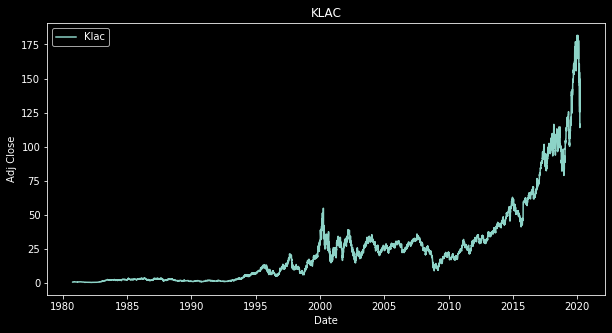

In [84]:
# deleting all columns and keeping just the date and adjusted close price 
klac_close= df.drop(df.columns[0:5], axis=1)
# let's visualize in a line plot how our stocks performed overtime 
# let's visualize in a line plot how our stocks performed overtime 
from matplotlib import style

# Adjusting the style 
style.use('dark_background')
plt.figure(figsize=(10,5))
ax1= sns.lineplot(x=klac_close.index, y= klac_close['Adj Close'], label='Klac');

plt.title("KLAC")

plt.legend()

plt.show()


df=pd.read_csv('KLAC_hist.csv')

In [85]:
df.reset_index(inplace=True)
data = generate_features(df)

In [88]:
data.to_csv('klac+features.csv')

In [20]:

#df=df.append({'date': '2020-01-28', 'open': 172.20, 'close':0}, ignore_index=True)

#del df
df=pd.read_csv('KLAC.csv')

In [21]:
pcnt_df = df['close'].pct_change(periods=1)#.apply(lambda x: x*100)

In [22]:
pcnt_df.tail()

date
2020-03-16   -0.109170
2020-03-17    0.155444
2020-03-18   -0.117690
2020-03-19   -0.035298
2020-03-20   -0.104742
Name: close, dtype: float64

In [23]:
import matplotlib.pyplot as plt

def scatter(dataset, column):
    plt.figure()
    plt.scatter(dataset[column] , dataset['return_1'])
    plt.ylabel('return_1')
    plt.xlabel(column)

In [24]:
data.columns

Index(['open_1', 'close_1', 'high_1', 'low_1', 'volume_1', 'H-L-1', 'O-C-1',
       'avg_price_5', 'avg_price_30', 'avg_price_365', 'ratio_avg_price_5_30',
       'ratio_avg_price_5_365', 'ratio_avg_price_30_365', 'avg_volume_5',
       'avg_volume_30', 'avg_volume_365', 'ratio_avg_volume_5_30',
       'ratio_avg_volume_5_365', 'ratio_avg_volume_30_365', 'std_price_5',
       'std_price_30', 'std_price_365', 'ratio_std_price_5_30',
       'ratio_std_price_5_365', 'ratio_std_price_30_365', 'std_volume_5',
       'std_volume_30', 'std_volume_365', 'ratio_std_volume_5_30',
       'ratio_std_volume_5_365', 'ratio_std_volume_30_365', 'return_1',
       'return_5', 'return_30', 'return_365', 'moving_avg_5', 'moving_avg_30',
       'moving_avg_365', 'Price_Rise'],
      dtype='object')

api_key_alpha='LQ7YJVLYENUQ88GJ'

from datetime import datetime
f = web.DataReader("KLAC", "av-daily", start=datetime(2016,11, 1), end=datetime(2019,12,17), api_key=api_key_alpha)

import matplotlib.pyplot as plt
import seaborn as sns

corr=df_n.corr()
close_corr=corr.iloc[[-8],:-8]
# Plotting the Correlation DF as a heatmap
plt.figure(figsize=(16,1))
sns.heatmap(close_corr, annot=False, linewidths=.1, cmap="coolwarm")
plt.xticks()
plt.yticks(rotation=0)
#plt.savefig("corr_dec.png")
plt.show()

for t in [1]:
    data[f'target_{t}m'] = data[f'return_{t}'].shift(-t)

corr=df_new.corr()
correlations_target = corr.sort_values('return_1')['return_1']
# Most negative correlations
correlations_target

In [42]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,50.900002,48.619999,49.330002,50.689999,4348200.0,28.737034
2006-01-04,50.939999,49.970001,50.490002,50.290001,3368600.0,28.510275
2006-01-05,51.009998,50.119999,50.290001,50.509998,4254500.0,28.634995
2006-01-06,52.000000,50.619999,50.900002,52.000000,4008600.0,29.479698
2006-01-09,53.349998,52.299999,52.450001,53.009998,5027100.0,30.052292


#### Technical Analysis Library in Python


In [43]:
df = ta.utils.dropna(df)

In [44]:
df.shape

(3578, 6)

In [46]:
# Add all ta features
df_new = ta.add_all_ta_features(
    df, open="Open", high="High", low="Low", close="Close", volume="Volume")

C:\Users\FLORENCIA\anaconda3\lib\site-packages\ta\trend.py:543: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i]/self._trs[i])
C:\Users\FLORENCIA\anaconda3\lib\site-packages\ta\trend.py:547: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i]/self._trs[i])


In [47]:
# Create target dataframe
# calculate other dataframes

In [48]:
df_new['return']=(df_new.Close.shift(-1)/df_new.Close)-1 #el retorno del prox día
df_new['target']= (df_new['return'] > 0).astype(int)

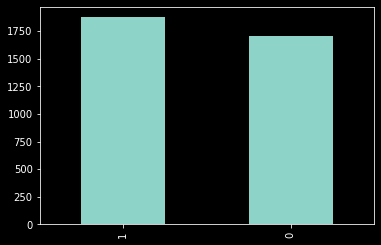

In [49]:
df_new['target'].value_counts().plot.bar()

In [50]:
df_new=df_new.drop(columns=['trend_psar_up', 'trend_psar_down'], axis=1)

In [51]:
df_new.fillna(method='bfill', inplace=True)

In [52]:
corr=df_new.corr()
correlations_target = corr.sort_values('target')['target']
# Most negative correlations
correlations_target

others_dlr       -0.052204
others_dr        -0.049803
volume_em        -0.030624
volatility_kcw   -0.029466
volume_cmf       -0.026554
                    ...   
volume_nvi        0.032640
volume_obv        0.035422
volume_adi        0.040973
return            0.684408
target            1.000000
Name: target, Length: 76, dtype: float64

In [53]:
data.to_csv("{}.csv".format(symbol+'mod'))

In [54]:
#  quitamos del archivo la columna con el label target.
X=df_new.drop(columns=['return', 'target'])
# por otro lado armamos el arhivo con los resultados
y=(df_new.target)

X.dropna(inplace=True)
y.dropna(inplace=True)

In [55]:
def get_holdout_set(target, features, period=6):
    idx = pd.IndexSlice
    label = target.name
    dates = np.sort(y.index.get_level_values('Date').unique())
    cv_start, cv_end = dates[0], dates[-period - 2]
    holdout_start, holdout_end = dates[-period - 1], dates[-1]

    df = features.join(target.to_frame())
    train = df.loc[idx[cv_start: cv_end], :]
    y_train, X_train = train[label], train.drop(label, axis=1)

    test = df.loc[idx[holdout_start: holdout_end], :]
    y_test, X_test = test[label], test.drop(label, axis=1)
    return y_train, X_train, y_test, X_test

In [56]:
train_y, train_X, test_y, test_X= get_holdout_set(y, X, period=24)

In [57]:
X_train=train_X.values
y_train=train_y.values
X_test=test_X.values
y_test=test_y.values

In [58]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)

In [59]:
from sklearn.model_selection import GridSearchCV

In [64]:
from sklearn.linear_model import SGDRegressor

param_grid = {"alpha": [1e-5, 3e-5, 1e-4],"eta0": [0.01, 0.03, 0.1],}
lr = SGDRegressor(penalty='l2', n_iter=1000)
grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='r2')
grid_search.fit(X_scaled_train, y_train)

C:\Users\FLORENCIA\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\FLORENCIA\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\FLORENCIA\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\FLORENCIA\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\FLORENCIA\Anaconda\lib\site-packages\sklearn\linear

C:\Users\FLORENCIA\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\FLORENCIA\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\FLORENCIA\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\FLORENCIA\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\FLORENCIA\Anaconda\lib\site-packages\sklearn\linear

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=None,
       n_iter=1000, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [1e-05, 3e-05, 0.0001], 'eta0': [0.01, 0.03, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [60]:
print(grid_search.best_params_)

NameError: name 'grid_search' is not defined

In [61]:
lr_best = grid_search.best_estimator_
predictions_lr = lr_best.predict(X_scaled_test)

NameError: name 'grid_search' is not defined

In [67]:
print('MSE: {0:.3f}'.format(mean_squared_error(y_test, predictions_lr)))

MSE: 0.250


In [68]:
print('MAE: {0:.3f}'.format(mean_absolute_error(y_test, predictions_lr)))

MAE: 0.496


In [69]:
print('R^2: {0:.3f}'.format(r2_score(y_test, predictions_lr)))

R^2: -0.017


### Neural network

In [ ]:
param_grid = {'hidden_layer_sizes': [(50, 10), (30, 30)],'activation': ['logistic', 'tanh', 'relu'],'solver': ['sgd', 'adam'],
'learning_rate_init': [0.0001, 0.0003, 0.001, 0.01],
'alpha': [0.00003, 0.0001, 0.0003],
'batch_size': [30, 50]}

from sklearn.neural_network import MLPRegressor
nn = MLPRegressor(random_state=42, max_iter=100)
grid_search = GridSearchCV(nn, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_scaled_train, y_train)


nn_best = grid_search.best_estimator_
predictions_nn = nn_best.predict(X_scaled_test)

In [ ]:
print('MSE: {0:.3f}'.format(mean_squared_error(y_test, predictions_nn)))

In [ ]:
print('MAE: {0:.3f}'.format(mean_absolute_error(y_test, predictions_nn)))

In [ ]:
print('R^2: {0:.3f}'.format(r2_score(y_test, predictions_nn)))

### Random forest Regression¶


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators=10, 
                                max_depth=None, 
                                min_samples_split=2, 
                                min_samples_leaf=1, 
                                min_weight_fraction_leaf=0.0, 
                                max_features='auto', 
                                max_leaf_nodes=None, 
                                min_impurity_decrease=0.0, 
                                min_impurity_split=None, 
                                bootstrap=True, 
                                oob_score=False, 
                                n_jobs=-1, 
                                random_state=None, 
                                verbose=0, 
                                warm_start=False)

In [ ]:
rf_reg.fit(y=y_train, X=X_train)

In [ ]:
predictions_rf_reg= rf_reg.predict(X_test)

In [ ]:
print('MSE: {0:.3f}'.format(mean_squared_error(y_test, predictions_rf_reg)))

In [ ]:
print('MAE: {0:.3f}'.format(mean_absolute_error(y_test, predictions_rf_reg)))

In [ ]:
print('R^2: {0:.3f}'.format(r2_score(y_test, predictions_rf_reg)))

In [ ]:
#del test
test=pd.DataFrame(y_test)

In [ ]:
predictions_lr=pd.DataFrame(predictions_lr)
predictions_rf_reg=pd.DataFrame(predictions_rf_reg)
predictions_nn=pd.DataFrame(predictions_nn)




In [ ]:
test=test.merge(predictions_lr, left_index=True, right_index=True, how='left',  suffixes=('_a', '_b'))
test.head()

In [ ]:
test=test.merge(predictions_rf_reg, left_index=True, right_index=True, how='left',  suffixes=('_c', '_d'))
test.head()

In [ ]:
test=test.merge(predictions_nn, left_index=True, right_index=True, how='left',  suffixes=('_e', '_f'))
test.head()

test['Price_Rise']= np.where(test['0_x'][:1] > y_train[-1], 1, 0)
test[:1]

In [ ]:
data.reset_index(inplace=True)

data.iloc[(len(data) - len(y_test)):,-1:]

In [ ]:
test['Price_Rise'] = np.where(test['0_a'] > test['0_a'].shift(1), 1, 0)
test['Price_Rise_modelo1'] = np.where(test['0_b'] > test['0_b'].shift(1), 1, 0)
test['Price_Rise_modelo2'] = np.where(test['0_e'] > test['0_e'].shift(1), 1, 0)
test['Price_Rise_modelo3'] = np.where(test['0_f'] > test['0_f'].shift(1), 1, 0)

#Computing Strategy Returns
test['Tomorrows Returns'] = 0
test['Tomorrows Returns'] = np.log(test['0_a']/test['0_a'].shift(1))
test['Tomorrows Returns'] = test['Tomorrows Returns'].shift(-1)


test['Strategy Returns1'] = 0
test['Strategy Returns1']= np.log(test['0_b']/test['0_b'].shift(1))
test['Strategy Returns1']=test['Strategy Returns1'].shift(-1)

#test['Strategy Returns1'] = np.where(test['Price_Rise_modelo1'] == test['Price_Rise'], test['Tomorrows Returns'], - test['Tomorrows Returns'])

test['Strategy Returns2'] = 0.
#test['Strategy Returns2'] = np.where(test['Price_Rise_modelo2'] == test['Price_Rise'], test['Tomorrows Returns'], - test['Tomorrows Returns'])
test['Strategy Returns2']= np.log(test['0_e']/test['0_e'].shift(1))
test['Strategy Returns2']=test['Strategy Returns2'].shift(-1)

test['Strategy Returns3'] = 0.
#test['Strategy Returns2'] = np.where(test['Price_Rise_modelo2'] == test['Price_Rise'], test['Tomorrows Returns'], - test['Tomorrows Returns'])
test['Strategy Returns3']= np.log(test['0_f']/test['0_f'].shift(1))
test['Strategy Returns3']=test['Strategy Returns3'].shift(-1)

test['Cumulative Market Returns'] = np.cumsum(test['Tomorrows Returns'])
test['Cumulative Strategy Returns1'] = np.cumsum(test['Strategy Returns1'])
test['Cumulative Strategy Returns2'] = np.cumsum(test['Strategy Returns2'])
test['Cumulative Strategy Returns3'] = np.cumsum(test['Strategy Returns3'])


In [ ]:
#Plotting the graph of returns
plt.figure(figsize=(10,5))
plt.plot(test['Cumulative Market Returns'], color='r', label='Market Returns')
plt.plot(test['Cumulative Strategy Returns1'], color='g', label='Strategy Returns1')
plt.plot(test['Cumulative Strategy Returns2'], color='b', label='Strategy Returns2')
plt.plot(test['Cumulative Strategy Returns3'], color='y', label='Strategy Returns3')

plt.legend()
plt.show()

In [ ]:
#Plotting the graph of returns
plt.figure(figsize=(10,5))
plt.plot(test['0_a'], color='r', label='Market Returns')
plt.plot(test['0_b'], color='g', label='Strategy Returns1')
plt.plot(test['0_e'], color='b', label='Strategy Returns2')
plt.plot(test['0_f'], color='y', label='Strategy Returns3')

plt.legend()
plt.show()

### Feature Importance

In [ ]:
(pd.Series(rf_reg.feature_importances_, 
          index=X.columns)
 .sort_values(ascending=False)
 .head(15)).sort_values().plot.barh(title='Feature Importance');

In [ ]:
predicted_test = rf_reg.predict(X_test)

In [ ]:
print('Error del modelo=', calculate_error(y_test, predicted_test))
print('RMSE del modelo=',np.sqrt(mse((y_test), predicted_test)))
print('Median Error del modelo=', median_error(y_test, predicted_test))
print('R2=', r2(y_test, predicted_test))
print('variance_score=', variance_score(y_test, predicted_test))

In [ ]:
#last date


### Guardar el modelo

In [ ]:
# Importing the library
from joblib import dump
# Saving the classification model as a file named 'xgboost.joblib'
dump(clf, “xgboost.joblib”)

In [ ]:
# Loading Pretrained XGBoost Model we made from our numerous trials
clf = load("xgboost_top10_feats_final_model.joblib")


### Fundamental Analysis

In [ ]:
# Loading Pretrained XGBoost Model
from joblib import load

clf = load("xgboost_top10_feats_final_model.joblib")


In [ ]:
clf